In [93]:
import numpy as np
import pandas as pd

# Importing the dataset
dataset = pd.read_csv('Mall_Customers.csv')
X = dataset.iloc[:, [2, 4]].values


# Using the elbow method to find the optimal number of clusters
from sklearn.cluster import DBSCAN
dbscan=DBSCAN(eps=4,min_samples=4)

# Fitting the model

model=dbscan.fit(X)

labels=model.labels_


from sklearn import metrics

#identifying the points which makes up our core points
sample_cores=np.zeros_like(labels,dtype=bool)

sample_cores[dbscan.core_sample_indices_]=True

#Calculating the number of clusters

n_clusters=len(set(labels))- (1 if -1 in labels else 0)



print(metrics.silhouette_score(X,labels))

0.1356017226017616


In [53]:
dataset

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [3]:
import matplotlib.pyplot as plt

In [94]:
labels

array([10,  0, -1,  0,  1,  0, -1, -1, -1,  2, -1, -1, 12,  0, -1,  0, 13,
       -1,  5, 11, 13,  0, -1,  2, -1, 11, -1,  3, 13, -1, -1,  0, -1, -1,
        4,  0,  4,  2, -1,  0, -1, -1, -1,  3,  5, -1,  6,  8,  1,  1,  6,
        3, -1, -1,  6,  6,  6,  7,  8,  6,  7,  8,  7, -1,  7,  8, -1,  7,
        8, -1,  7,  6,  7, -1,  7,  8, -1, -1,  8,  6,  7, -1, -1,  6,  8,
        6, -1,  8,  3,  6,  7, 10,  6,  9,  1,  8,  6,  8,  6,  8, 10,  6,
       -1,  8,  6, 10,  7,  6,  7,  7,  7,  8,  9,  8,  8,  8, -1,  6,  6,
        6,  8,  9, -1, 11, -1,  2, -1, -1, 12,  2, -1,  2, -1,  2, -1, 11,
       -1,  2, -1,  2, -1, 11,  1, 11, -1, -1, -1,  2, -1, 11,  4, 11,  4,
        2,  4, 11, -1,  2, -1,  2, -1, 11, -1, 11,  5,  2,  4, 11, -1,  3,
       -1,  2, -1, 11,  4, 11, 12, -1, 12, 11, 13, 11,  4, 11,  9, 11, -1,
       -1,  4, -1, -1,  2, -1, 11,  4, -1,  5,  2, -1, 11], dtype=int64)

In [4]:
%matplotlib inline

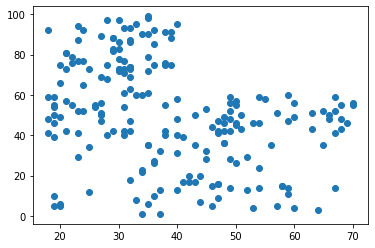

In [33]:
plt.scatter(dataset['Age'],dataset['Spending Score (1-100)'])

In [14]:
len(X)

200

In [13]:
len(labels)

200

In [95]:
dataset['cluster']=labels

In [35]:
dataset

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100),cluster
0,1,Male,19,15,39,-1
1,2,Male,21,15,81,0
2,3,Female,20,16,6,-1
3,4,Female,23,16,77,0
4,5,Female,31,17,40,1
...,...,...,...,...,...,...
195,196,Female,35,120,79,-1
196,197,Female,45,126,28,-1
197,198,Male,32,126,74,2
198,199,Male,32,137,18,-1


In [96]:
dataset.cluster.value_counts()

-1     62
 11    20
 6     20
 8     18
 2     17
 7     14
 4     10
 0      9
 1      5
 3      5
 10     4
 12     4
 13     4
 5      4
 9      4
Name: cluster, dtype: int64

In [37]:
import seaborn as sns

In [92]:
dataset.cluster.value_counts()

-1     103
 5      14
 2      10
 13      9
 0       7
 7       7
 6       5
 1       5
 12      4
 11      4
 9       4
 8       4
 10      4
 3       4
 14      4
 4       4
 16      4
 15      4
Name: cluster, dtype: int64

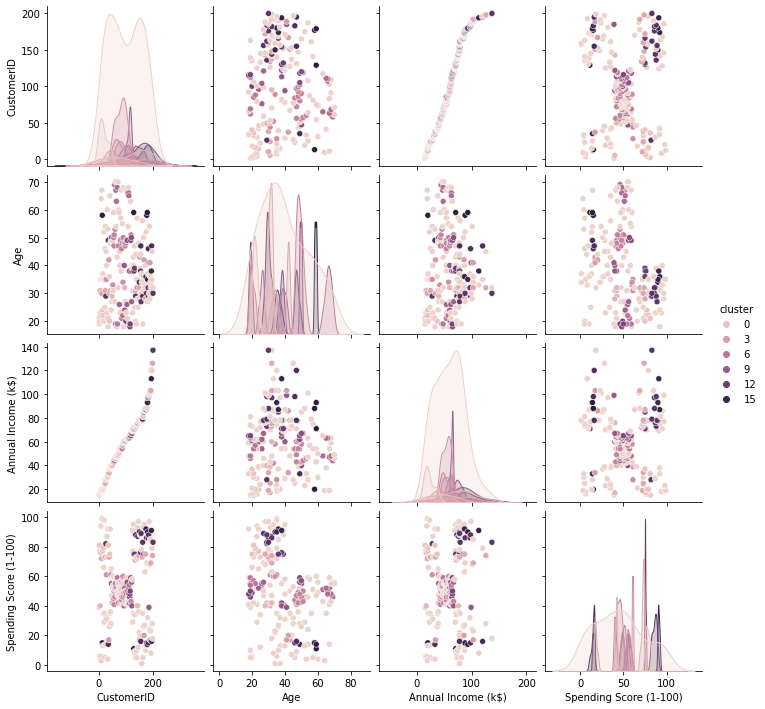

In [87]:
sns.pairplot(dataset,hue='cluster')

No handles with labels found to put in legend.


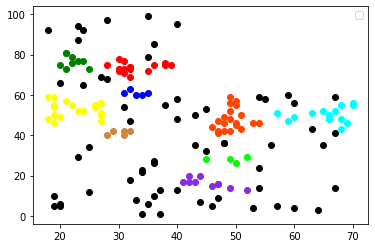

In [97]:
df_1 = dataset[dataset.cluster==-1]
df0 = dataset[dataset.cluster==0]
df1 = dataset[dataset.cluster==1]
df2 = dataset[dataset.cluster==2]
df3 = dataset[dataset.cluster==3]
df4 = dataset[dataset.cluster==4]
df5 = dataset[dataset.cluster==5]
df6 = dataset[dataset.cluster==6]
df7 = dataset[dataset.cluster==7]
df8 = dataset[dataset.cluster==8]
plt.scatter(df_1.Age,df_1['Spending Score (1-100)'],color='black')
plt.scatter(df0.Age,df0['Spending Score (1-100)'],color='green')
plt.scatter(df1.Age,df1['Spending Score (1-100)'],color='peru')
plt.scatter(df2.Age,df2['Spending Score (1-100)'],color='red')
plt.scatter(df3.Age,df3['Spending Score (1-100)'],color='blue')
plt.scatter(df4.Age,df4['Spending Score (1-100)'],color='blueviolet')
plt.scatter(df5.Age,df5['Spending Score (1-100)'],color='lime')
plt.scatter(df6.Age,df6['Spending Score (1-100)'],color='orangered')
plt.scatter(df7.Age,df7['Spending Score (1-100)'],color='aqua')
plt.scatter(df8.Age,df8['Spending Score (1-100)'],color='yellow')

#plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='purple',marker='*',label='centroid')
plt.legend()

In [45]:
dataset[dataset.cluster==4]

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100),cluster
34,35,Female,49,33,14,4
36,37,Female,42,34,17,4
150,151,Male,43,78,17,4
152,153,Female,44,78,20,4
154,155,Female,47,78,16,4
166,167,Male,42,86,20,4
174,175,Female,52,88,13,4
182,183,Male,46,98,15,4
188,189,Female,41,103,17,4
194,195,Female,47,120,16,4
